In [1]:
import numpy as np 
w_i_h = weights_input_hidden = np.random.uniform(-0.5,0.5,(32,784))# the whole thing is 5 by 4 by 3 but we go by right to left (better computing) 
w_h_o = weights_hidden_output = np.random.uniform(-0.5,0.5,(10,32))
print(w_i_h)
print(w_h_o)

[[ 0.00585384  0.03641903 -0.29968144 ...  0.33876634  0.27468906
  -0.14427771]
 [-0.2443528  -0.32866549  0.08135715 ...  0.32054601  0.18519927
  -0.0410405 ]
 [ 0.09031791 -0.23617362  0.08630155 ... -0.45357608  0.44292795
  -0.42918779]
 ...
 [-0.3706507  -0.01884843  0.02850666 ...  0.10456928 -0.31105148
  -0.24596292]
 [ 0.04507137  0.13080167 -0.36790434 ... -0.34856744 -0.15052111
   0.30220744]
 [-0.46624793 -0.26514075  0.41162099 ...  0.0302399  -0.08481793
   0.27250841]]
[[ 0.43430719  0.10851007  0.07314632  0.20026877 -0.35414975  0.48978211
   0.46705249  0.39332177 -0.29923493 -0.30296973 -0.15514075 -0.07850211
   0.23924372  0.46573083  0.4672275   0.27483469 -0.13638132 -0.30748841
   0.47458153 -0.13041831 -0.39445448  0.01318908  0.2780732   0.27325637
  -0.30651523  0.08046762 -0.00878406  0.27541084  0.399376   -0.35521742
  -0.39061459  0.22909506]
 [-0.19450606 -0.32801371 -0.38885107 -0.08243171 -0.06580933 -0.41226487
  -0.20705009 -0.40069483  0.4198375 

In [2]:
#bias neuron added to the hidden layer(s) and the output layer 
b_i_h = bias_input_hidden = np.zeros((32,1))
b_h_o = bias_hidden_output = np.zeros((10,1))
print(b_i_h)
print(b_h_o)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [3]:
from data import get_mnist
images, labels = get_mnist()
print(images.shape)
print(labels.shape)


(60000, 784)
(60000, 10)


In [4]:
def batch_norm(o_pre, gamma, beta, eps=1e-5):
    # Compute mean and variance along the batch dimension
    batch_mean = np.mean(o_pre, axis=0)
    batch_var = np.var(o_pre, axis=0)
    
    # Normalize
    o_norm = (o_pre - batch_mean) / np.sqrt(batch_var + eps)
    
    # Scale and shift
    out = gamma * o_norm + beta
    
    return out

In [5]:
epochs = 10
nr_correct = 0
learning_rate = 0.01
for epoch in range(epochs):
    for img,l in zip(images,labels):
        img.shape += (1,)#change from 784 vector into (784,1)
        l.shape += (1,)# change from 10 vector into (10,1)
        
        #forward pass 
        h_pre = b_i_h + np.dot(w_i_h,img) #bias [32,1] + weight [32,784] * image [784,1]
        h = 1 / (1+np.exp(-h_pre)) #activation function for normalization   
        #gamma = np.ones((h_pre.shape[0],))  # Initialize to ones nomalization
        #beta = np.zeros((h_pre.shape[0],))
        # h = np.maximum(0, batch_norm(h_pre,gamma,beta)) # relu
        o_pre = b_h_o + np.dot(w_h_o,h) #bias [10,1] + weight [10,32] * image [32,1]
        o = 1 / (1+np.exp(-o_pre)) #activation function for normalization
        #gamma = np.ones((o_pre.shape[0],))  # Initialize to ones nomalization
        #beta = np.zeros((o_pre.shape[0],))
        # o = np.maximum(0, batch_norm(o_pre,gamma,beta)) # relu
        
        #loss function
        e = 1/len(o)*np.sum((o-l)**2,axis=0) #MSE
        nr_correct += int(np.argmax(o)==np.argmax(l)) #know accuracy

        #backward propagation
        delta_o = o-l #error
        w_h_o += -learning_rate*np.dot(delta_o,np.transpose(h)) #update weight
        b_h_o += -learning_rate*delta_o #update bias
        delta_h = np.dot(np.transpose(w_h_o),delta_o)*(h*(1-h)) #error
        w_i_h += -learning_rate*np.dot(delta_h,np.transpose(img)) #update weight
        b_i_h += -learning_rate*delta_h #update bias
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0




    

Acc: 87.44%
Acc: 93.18%
Acc: 94.33%
Acc: 94.97%
Acc: 95.41%
Acc: 95.79%
Acc: 96.13%
Acc: 96.37%
Acc: 96.58%
Acc: 96.79%


In [6]:
from sklearn.datasets import fetch_openml

# Fetch the entire dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# The last 10,000 samples are the test set
X_test = X[-10000:]
y_test = y[-10000:]

/home/rail_hail/.conda/envs/Font/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
# Convert labels to integers (they're loaded as strings)
y_test = y_test.astype(int)

# Normalize pixel values
X_test = X_test.astype('float32') / 255.0

def to_one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]
y_test_onehot = to_one_hot(y_test)
print(f'the shape of y test{y_test.shape}')
print(f'the shape of X test{X_test.shape}')
print(f'the shape of y test_ontshot{y_test_onehot.shape}')

the shape of y test(10000,)
the shape of X test(10000, 784)
the shape of y test_ontshot(10000, 10)


In [8]:
nr_correct = 0
num = 0
for img,l in zip(X_test,y_test_onehot):
    num += 1
    img.shape += (1,)#change from 784 vector into (784,1)
    l.shape += (1,)# change from 10 vector into (10,1)
    #forward pass 
    h_pre = b_i_h + np.dot(w_i_h,img) #bias [32,1] + weight [32,784] * image [784,1]
    h = 1 / (1+np.exp(-h_pre)) #activation function for normalization   
    #gamma = np.ones((h_pre.shape[0],))  # Initialize to ones nomalization
    #beta = np.zeros((h_pre.shape[0],))
    # h = np.maximum(0, batch_norm(h_pre,gamma,beta)) # relu
    o_pre = b_h_o + np.dot(w_h_o,h) #bias [10,1] + weight [10,32] * image [32,1]
    o = 1 / (1+np.exp(-o_pre)) #activation function for normalization
    #gamma = np.ones((o_pre.shape[0],))  # Initialize to ones nomalization
    #beta = np.zeros((o_pre.shape[0],))
    # o = np.maximum(0, batch_norm(o_pre,gamma,beta)) # relu
    nr_correct += int(np.argmax(o)==np.argmax(l))
    # print(f"Predicted: {np.argmax(o)}, Actual: {np.argmax(l)}")
print(f"Acc: {round((nr_correct / X_test.shape[0]) * 100, 2)}%")
print(num)

Acc: 95.73%
10000


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
# Load and preprocess a single image
def load_and_preprocess_image(file_path):
    with Image.open(file_path).convert('L') as img:
        img = img.resize((28, 28))
        img_array = np.array(img)
        if img_array.mean() > 128:
            img_array = 255 - img_array
        img_array = img_array / 255.0
        img_array = img_array.reshape(784, 1)
    return img_array
# Function to display the image
def display_image(img_array):
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()
    # Function to predict using your neural network
def predict(img, w_i_h, b_i_h, w_h_o, b_h_o):
    h_pre = b_i_h + np.dot(w_i_h, img)
    h = 1 / (1 + np.exp(-h_pre))
    o_pre = b_h_o + np.dot(w_h_o, h)
    o = 1 / (1 + np.exp(-o_pre))
    return o

Displaying the image:


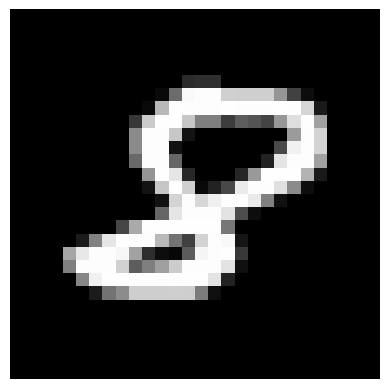

In [16]:
# Main process
folder_path = 'test'  # Change this to your image directory
file_name = '0009.png'  # Change this to your image file name
# Load and display the image
file_path = os.path.join(folder_path, file_name)
img = load_and_preprocess_image(file_path)

print("Displaying the image:")
display_image(img)

In [17]:

# Pass the image through the neural network
output = predict(img, w_i_h, b_i_h, w_h_o, b_h_o)

# Display the results
print("\nNeural Network Output:")
for i, prob in enumerate(output):
    print(f"Digit {i}: {prob[0]:.4f}")

print(f"\nPredicted digit: {np.argmax(output)}")


Neural Network Output:
Digit 0: 0.0107
Digit 1: 0.0001
Digit 2: 0.5723
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0004
Digit 6: 0.0013
Digit 7: 0.0000
Digit 8: 0.7524
Digit 9: 0.0011

Predicted digit: 8
